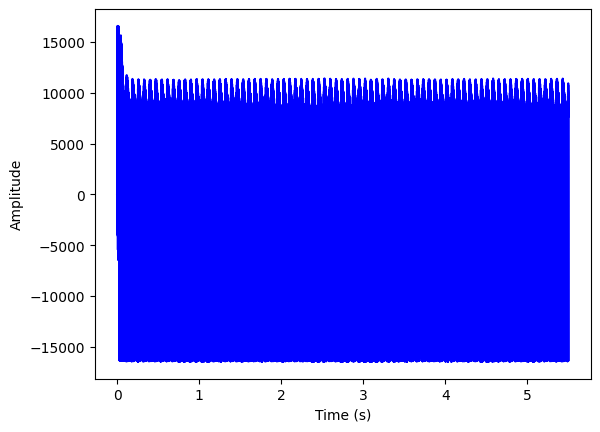

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io.wavfile import read

sample_rate, audio_data = read("D:/TF026.WAV")

audio_data = np.array(audio_data)

length = audio_data.shape[0] / sample_rate

time = np.linspace(0., length, audio_data.shape[0])

plt.plot(time, audio_data, color='blue')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [4]:
# Load audio
audio, sr = librosa.load("D:/TF026.WAV", sr=None)
import librosa

audio_data = audio_data.astype(np.float32)

# Convert to spectrogram
spectrogram = librosa.stft(audio)
spectrogram_db = librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max)


In [5]:
# Optionally transpose to (time_steps, features)
spectrogram_db = spectrogram_db.T  # Shape: (num_frames, num_freq_bins)

from sklearn.model_selection import train_test_split

# Example: 80% training, 20% testing
X_train, X_test = train_test_split(spectrogram_db, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (95, 1025)
Test shape: (24, 1025)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

y = np.random.randint(0, 2, size=spectrogram_db.shape[1])  
y_train, y_test = train_test_split(y, test_size=0.2, random_state=42)

# Make sure X and y match in size
X = spectrogram_db.T  # Shape: (time_frames, frequency_bins)

# Split X as well (you may already have this)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 49.27%
